In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Lien du dataset
https://www.kaggle.com/shrutimehta/nasa-asteroids-classification

In [2]:
df_nasa = pd.read_csv("csv_files/nasa.csv")

df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [3]:
df_nasa.shape

(4687, 40)

# Partie 1 : Analyse graphique des données

## 1-1 : Suppression des valeurs "doublons"
#### Exemple : Distances indiquées en KM, Mètre, Miles et Feet

In [4]:
nasa = df_nasa.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', "Relative Velocity km per sec"], axis="columns")

nasa.shape

(4687, 30)

## 1-2 : Nettoyage des données manquantes
(D'après la shape Avant/Après, auucune valeur NAN supprimée )

In [5]:
nasa = nasa.dropna()
nasa.shape

(4687, 30)

In [6]:
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in Miles(min),Est Dia in Miles(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(miles),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.079051,0.176763,1995-01-01,788947200000,22017.003799,13680.509944,38993336.0,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.090762,0.202951,1995-01-01,788947200000,65210.346095,40519.173105,35603420.0,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.143849,0.321655,1995-01-08,789552000000,27326.560182,16979.661798,4736657.5,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.005469,0.012229,1995-01-15,790156800000,40225.948191,24994.839864,26522368.0,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.079051,0.176763,1995-01-15,790156800000,35426.991794,22012.954985,37910368.0,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## 1-3 : Encodage des données

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
nasa = nasa.apply(LabelEncoder().fit_transform)

nasa.shape

(4687, 30)

## 1-3 : Heatmap avec matrice de correlation

#### Suppression de plusieurs colonnes pour la matrice de correlation, étant les moins importantes de par le peu de correlation qu'elles impliquent : Améliore la lisibilité des variables correllées

<AxesSubplot:>

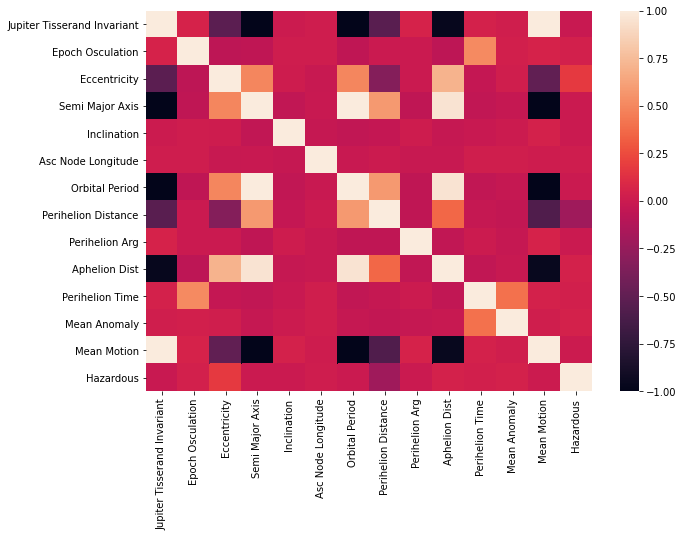

In [11]:
plt.subplots(figsize=(10,7))


correlation_nasa = nasa.drop(["Neo Reference ID", 'Name', "Orbiting Body", "Equinox", "Absolute Magnitude", "Est Dia in Miles(min)", "Est Dia in Miles(max)", "Close Approach Date", "Epoch Date Close Approach","Relative Velocity km per hr", "Miles per hour", "Miss Dist.(miles)", "Orbit ID", "Orbit Determination Date", "Orbit Uncertainity", "Minimum Orbit Intersection"], axis="columns").corr()
sns.heatmap(correlation_nasa)

<AxesSubplot:xlabel='Hazardous', ylabel='Orbital Period'>

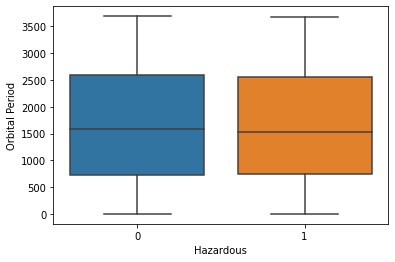

In [12]:
sns.boxplot(data=nasa, x='Hazardous', y="Orbital Period")


## Partie 1.5 : Préparation des data pour le model building

### Séparation des features de la target

In [13]:
x = nasa.drop("Hazardous", axis="columns")
y = nasa["Hazardous"]

print(x.shape, y.shape)

(4687, 29) (4687,)


### Train Test Split

In [46]:
#Import de train_test_split depuis sklearn
from sklearn.model_selection import train_test_split

splits = train_test_split (x, y, train_size=0.3, stratify=y, random_state=25)

xTrain, xTest, yTrain, yTest = splits

## Partie 2A : Model Building avec KNearest Neighors 

In [73]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=1)

knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=1, p=1)

In [74]:
knn.score(xTest, yTest)

0.8613227674489485